# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets 

In [3]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 138 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 37.0 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 38.2 MB/s eta 0:00:01
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
import ipywidgets
print(ipywidgets.__version__)

8.0.6


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the data to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data
])
# Create training set and define training dataloader
## YOUR CODE HERE ##
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
# Create test set and define test dataloader
## YOUR CODE HERE ##
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

To convert image data PyTorch tensor format, the "ToTensor()" function is used. Because neural networks in PyTorch operate on tensors, allowing for efficient computation and automatic differentiation, this transformation is required.

"Normalise()" normalises the tensor data. Normalisation helps to standardise the input data by bringing pixel values into a similar range, which can help in faster convergence and better model performance.

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

5


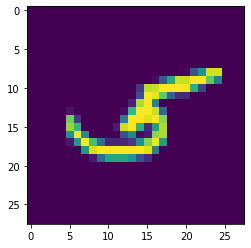

5


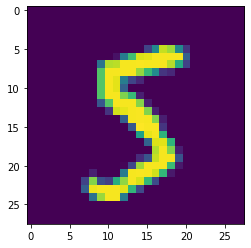

7


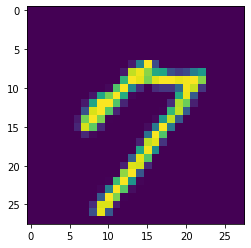

4


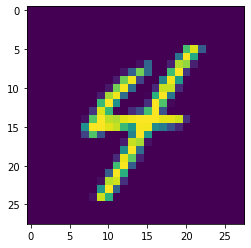

2


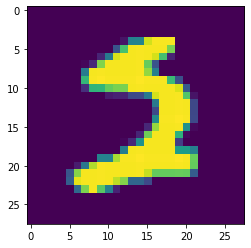

In [5]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
## YOUR CODE HERE ##
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Creating an instance of the network
net = Net()

# Defining the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Defining the loss function
criterion = nn.CrossEntropyLoss()


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [ ]:
## YOUR CODE HERE ##

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
## YOUR CODE HERE ##
num_epochs = 8

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = net(inputs)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 200 == 199:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 200:.3f}')
            running_loss = 0.0


Epoch 1, Batch 200, Loss: 2.086
Epoch 1, Batch 400, Loss: 1.234
Epoch 1, Batch 600, Loss: 0.716
Epoch 1, Batch 800, Loss: 0.533
Epoch 2, Batch 200, Loss: 0.427
Epoch 2, Batch 400, Loss: 0.392
Epoch 2, Batch 600, Loss: 0.385
Epoch 2, Batch 800, Loss: 0.359
Epoch 3, Batch 200, Loss: 0.330
Epoch 3, Batch 400, Loss: 0.327
Epoch 3, Batch 600, Loss: 0.326
Epoch 3, Batch 800, Loss: 0.316
Epoch 4, Batch 200, Loss: 0.302
Epoch 4, Batch 400, Loss: 0.286
Epoch 4, Batch 600, Loss: 0.295
Epoch 4, Batch 800, Loss: 0.283
Epoch 5, Batch 200, Loss: 0.267
Epoch 5, Batch 400, Loss: 0.254
Epoch 5, Batch 600, Loss: 0.265
Epoch 5, Batch 800, Loss: 0.281
Epoch 6, Batch 200, Loss: 0.253
Epoch 6, Batch 400, Loss: 0.239
Epoch 6, Batch 600, Loss: 0.248
Epoch 6, Batch 800, Loss: 0.236
Epoch 7, Batch 200, Loss: 0.226
Epoch 7, Batch 400, Loss: 0.225
Epoch 7, Batch 600, Loss: 0.226
Epoch 7, Batch 800, Loss: 0.223
Epoch 8, Batch 200, Loss: 0.213
Epoch 8, Batch 400, Loss: 0.211
Epoch 8, Batch 600, Loss: 0.204
Epoch 8,

Plot the training loss (and validation loss/accuracy, if recorded).

In [ ]:
## YOUR CODE HERE ##

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [9]:
## YOUR CODE HERE ##
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Set Accuracy: {accuracy * 100:.2f}%')


Test Set Accuracy: 93.88%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [ ]:
## YOUR CODE HERE ##

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
## YOUR CODE HERE ##
torch.save(net.state_dict(), 'model.pth1')
